In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import kstest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 2.10

In [2]:
q11 = pd.read_csv(r'./data/w-Aaa.txt', sep='\s+',header=None)
q12 = pd.read_csv(r'./data/w-Baa.txt', sep='\s+',header=None)

In [3]:
q11,q12

(         0  1   2     3
 0     1962  1   5  4.43
 1     1962  1  12  4.42
 2     1962  1  19  4.42
 3     1962  1  26  4.41
 4     1962  2   2  4.42
 ...    ... ..  ..   ...
 2462  2009  3  13  5.49
 2463  2009  3  20  5.62
 2464  2009  3  27  5.51
 2465  2009  4   3  5.41
 2466  2009  4  10  5.47
 
 [2467 rows x 4 columns],
          0  1   2     3
 0     1962  1   5  5.11
 1     1962  1  12  5.09
 2     1962  1  19  5.08
 3     1962  1  26  5.08
 4     1962  2   2  5.07
 ...    ... ..  ..   ...
 2462  2009  3  13  8.40
 2463  2009  3  20  8.50
 2464  2009  3  27  8.53
 2465  2009  4   3  8.47
 2466  2009  4  10  8.58
 
 [2467 rows x 4 columns])

由于所给数据集是日盈利，因此需要计算越盈利的数据。

In [4]:
aaa = q11.groupby([0,1]).agg(np.mean)[3]
baa = q12.groupby([0,1]).agg(np.mean)[3]

In [5]:
a = {'样本均值':aaa.mean(), '样本标准差':aaa.std(), '样本偏度':aaa.skew(), '样本峰度':aaa.kurt(), '最小值':aaa.min(), '最大值':aaa.max()}
a

{'样本均值': 7.826196302816901,
 '样本标准差': 2.41727888390622,
 '样本偏度': 0.8565222533136774,
 '样本峰度': 0.5797577755120082,
 '最小值': 4.19,
 '最大值': 15.459999999999999}

In [18]:
b = {'样本均值':baa.mean(), '样本标准差':baa.std(), '样本偏度':baa.skew(), '样本峰度':baa.kurt(), '最小值':baa.min(), '最大值':baa.max()}
b

{'样本均值': 8.845450704225351,
 '样本标准差': 2.7154844258212583,
 '样本偏度': 0.9323342600233013,
 '样本峰度': 0.7812708852970891,
 '最小值': 4.782500000000001,
 '最大值': 17.1825}

$$ t = \frac{\hat{S}}{(6/T)^{0.5}} $$

In [19]:
s = aaa.skew()
T = len(aaa)
t = s/((6/T)**0.5)
t = abs(t)
t

8.333687163149278

In [22]:
Z = stats.norm(loc=0, scale=1)
pval = Z.sf(t)+Z.cdf(-t)
pval

7.836281637868428e-17

AAA月盈利在5%显著性水平上可以拒绝原假设，因此是偏斜的。

$$ t = \frac{\hat{K}-3}{(24/T)^{0.5}} $$

In [24]:
k = aaa.kurt()
T = len(aaa)
t = (k-3)/((24/T)**0.5)
t = abs(t)
t

11.774090795596

In [25]:
Z = stats.norm(loc=0, scale=1)
pval = Z.sf(t)+Z.cdf(-t)
pval

5.308638310582236e-32

AAA月盈利在5%显著性水平上可以拒绝原假设，因此是厚尾的。

同理，对BAA：

In [26]:
s = baa.skew()
T = len(baa)
t = s/((6/T)**0.5)
t = abs(t)
Z = stats.norm(loc=0, scale=1)
pval = Z.sf(t)+Z.cdf(-t)
print(pval)
k = baa.kurt()
T = len(baa)
t = (k-3)/((24/T)**0.5)
t = abs(t)
Z = stats.norm(loc=0, scale=1)
pval = Z.sf(t)+Z.cdf(-t)
print(pval)

1.175905659728104e-19
3.6839462592281755e-27


看出来，BAA和AAA情况一样。

# 2.11

In [41]:
ind = [i for i in range(len(aaa))]
aaa.index = ind

In [42]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

model = pm.auto_arima(aaa, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-116.884, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-20.810, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-85.132, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-115.260, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-22.777, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-114.467, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-118.485, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-114.128, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-119.906, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-118.663, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-116.418, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-121.883, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-87.116, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-120.641, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             :

In [43]:
model = ARIMA(aaa, order=(2,1,0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      3   No. Observations:                  568
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  63.941
Date:                Sat, 07 May 2022   AIC                           -121.883
Time:                        17:45:08   BIC                           -108.862
Sample:                             0   HQIC                          -116.801
                                - 568                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4155      0.025     16.391      0.000       0.366       0.465
ar.L2         -0.2505      0.021    -11.757      0.000      -0.292      -0.209
sigma2         0.0467      0.002     29.859      0.000       0.044       0.050
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               470.86
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               2.77   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

由上，建立ARIMA(2,1,0)模型

# 2.12

日盈利建立多元时间序列Vector Autoregression (VAR)

In [45]:
a = q11[3].copy(deep=True)
b = q12[3].copy(deep=True)

In [47]:
from statsmodels.tsa.vector_ar.var_model import VAR
data = list()
for i in range(len(a)):
    v1 = a[i]
    v2 = b[i]
    row = [v1, v2]
    data.append(row)

In [49]:
# fit model
model = VAR(data)
result = model.fit()
result.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 07, May, 2022
Time:                     18:18:12
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.7811
Nobs:                     2466.00    HQIC:                  -10.7901
Log likelihood:           6318.38    FPE:                2.04959e-05
AIC:                     -10.7953    Det(Omega_mle):     2.04462e-05
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.010423         0.006619            1.575           0.115
L1.y1         1.016856         0.005835          174.259           0.000
L1.y2        -0.016051         0.005194           -3.090           0.002

Results for equation 

In [54]:
result.params

array([[ 0.01042347,  0.00834644],
       [ 1.01685612,  0.02451665],
       [-0.01605058,  0.9775149 ]])

其中，y1是AAA的日盈利，y2是BAA的日盈利：
$$
\begin{equation}
\begin{pmatrix}
y1(t)\\
y2(t)
\end{pmatrix}
=
\begin{pmatrix}
0.01042347\\ 0.00834644
\end{pmatrix}
+
\begin{pmatrix}
1.01685612 & -0.01605058\\
0.02451665 & 0.9775149
\end{pmatrix}
\begin{pmatrix}
y1(t-1)\\
y2(t-1)
\end{pmatrix}
+
\begin{pmatrix}
e1(t)\\
e2(t)
\end{pmatrix}
\end{equation}
$$

# 2.13

In [55]:
q4 = pd.read_csv(r'./data/m-ew6299.txt', sep='\s+',header=None)

<AxesSubplot:>

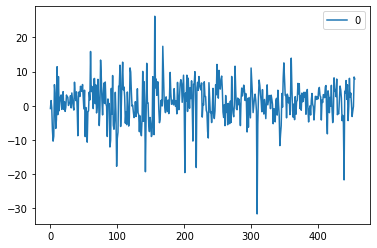

In [57]:
q4
q4.plot()

## 2.11(a)(b)

由于题目要求直接建立AR模型和MA，因此就不考虑检验平稳等预分析。

C:\Users\20123\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


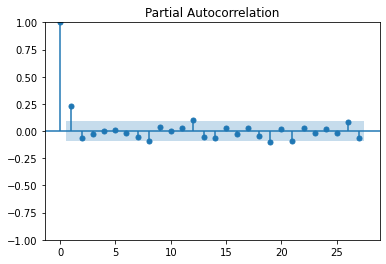

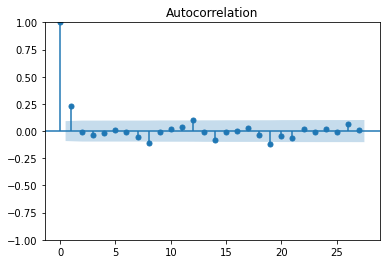

In [60]:
# mpl.rcParams.update(mpl.rcParamsDefault)
plot_pacf(q4)
# plt.savefig('p.pdf')
plt.show()
plot_acf(q4)
# plt.savefig('a.pdf')
plt.show()

In [63]:
import statsmodels.tsa.stattools as st

model = st.arma_order_select_ic(q4, max_ar=12, max_ma=12, ic=['aicc', 'bic', 'hqic']) # 都选12是因为上面的acf和pacf都是在第12阶明显显著
model.aicc_min_order #返回一个元组，分别为p值和q值

C:\Users\20123\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\20123\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\20123\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\20123\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

(2, 3)

In [105]:
# AR2模型如下
# from statsmodels.tsa.ar_model import AutoReg as AR

data = q4[0]
model1 = ARIMA(data,order=(2,0,0))
result1 = model1.fit()
result1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  456
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1419.176
Date:                Sat, 07 May 2022   AIC                           2846.352
Time:                        20:37:40   BIC                           2862.842
Sample:                             0   HQIC                          2852.848
                                - 456                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0600      0.337      3.147      0.002       0.400       1.720
ar.L1          0.2410      0.050      4.861      0.000       0.144       0.338
ar.L2         -0.0640      0.048     -1.325      0.185      -0.159       0.031
sigma2        29.5606      1.150     25.711      0.000      27.307      31.814
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               410.60
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.50
Prob(H) (two-sided):                  0.05   Kurtosis:                         7.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

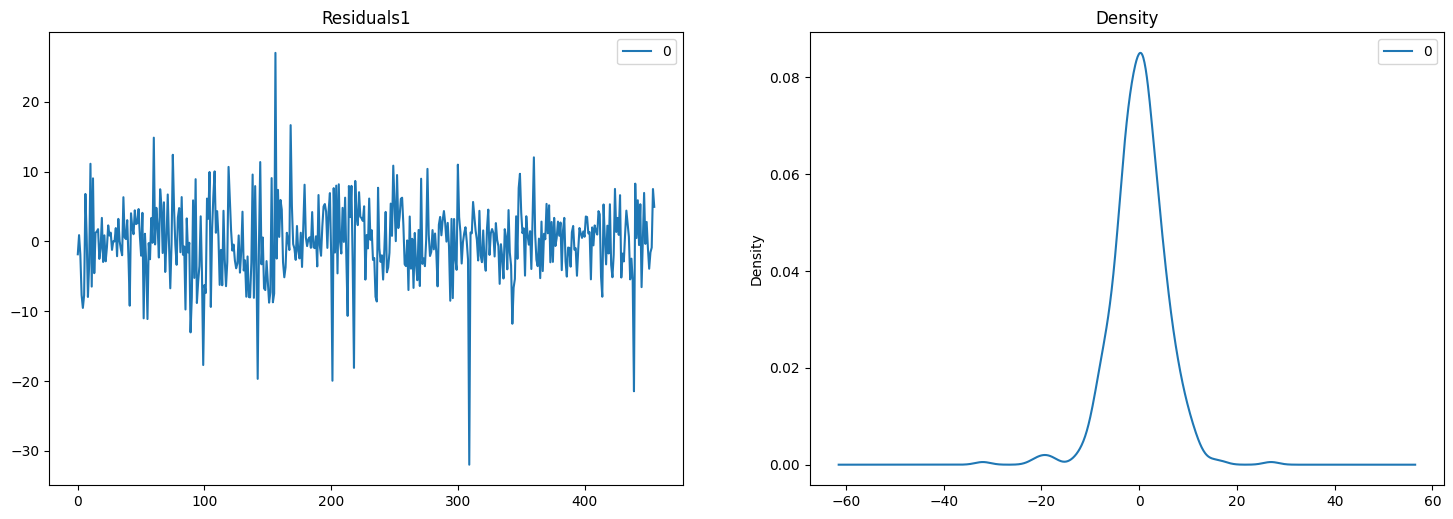

In [106]:
plt.rcParams.update({'figure.figsize':(18,6), 'figure.dpi':100})
residuals1 = pd.DataFrame(result1.resid)
fig, ax = plt.subplots(1,2)
residuals1.plot(title="Residuals1", ax=ax[0])
residuals1.plot(kind='kde', title='Density', ax=ax[1])
# plt.savefig('res.pdf')
plt.show()

In [107]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljungbox_result = acorr_ljungbox(residuals1, lags=20)  # 返回统计量和p值，lags为检验的延迟数
ljungbox_result

,lb_stat,lb_pvalue
1,0.000457,0.982944
2,0.011383,0.994325
3,0.200038,0.977583
4,0.258279,0.992346
5,0.307721,0.997495
6,0.322751,0.999379
7,0.752347,0.997900
8,5.779224,0.671946
9,5.912093,0.748683
10,5.952762,0.819216


显然。每个p都大于0.05，故残差序列为白噪声序列。模型拟合良好。

In [133]:
# MA3模型如下
from statsmodels.tsa.arima.model import ARIMA

model2 = ARIMA(data,order=(0,0,3))
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  456
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1419.139
Date:                Sat, 07 May 2022   AIC                           2848.278
Time:                        20:57:11   BIC                           2868.890
Sample:                             0   HQIC                          2856.397
                                - 456                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0599      0.336      3.155      0.002       0.402       1.718
ma.L1          0.2388      0.050      4.778      0.000       0.141       0.337
ma.L2         -0.0011      0.047     -0.024      0.981      -0.093       0.091
ma.L3         -0.0311      0.046     -0.671      0.502      -0.122       0.060
sigma2        29.5557      1.177     25.115      0.000      27.249      31.862
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               421.73
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.50
Prob(H) (two-sided):                  0.04   Kurtosis:                         7.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

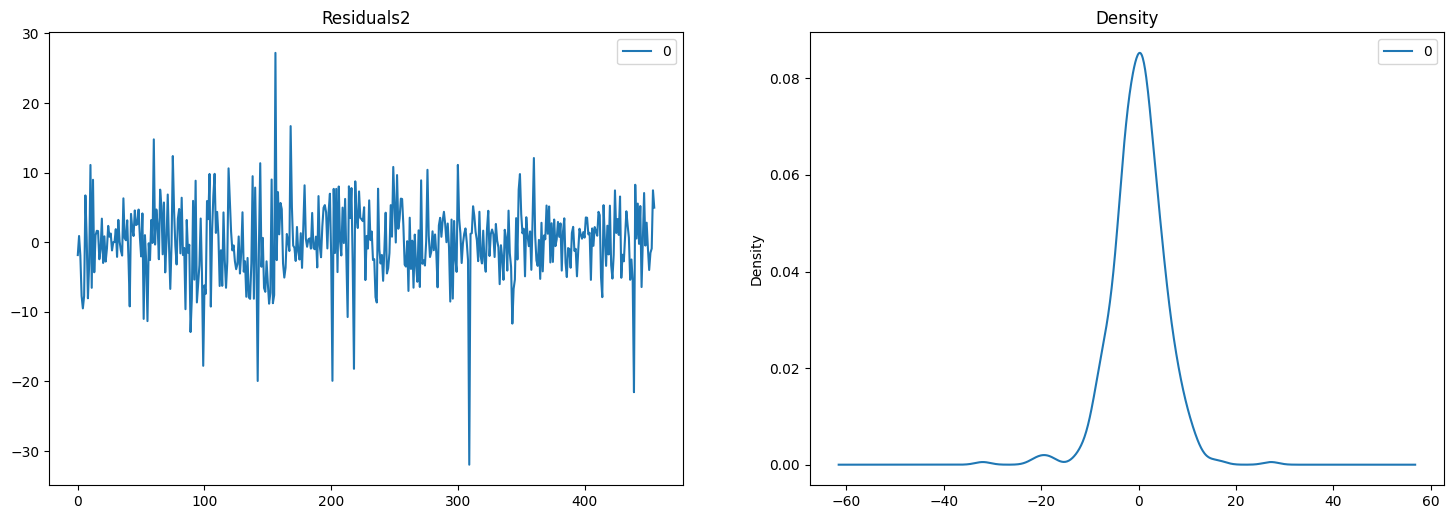

In [99]:
plt.rcParams.update({'figure.figsize':(18,6), 'figure.dpi':100})
residuals2 = pd.DataFrame(result2.resid)
fig, ax = plt.subplots(1,2)
residuals2.plot(title="Residuals2", ax=ax[0])
residuals2.plot(kind='kde', title='Density', ax=ax[1])
# plt.savefig('res.pdf')
plt.show()

In [100]:
ljungbox_result = acorr_ljungbox(residuals2, lags=20)  # 返回统计量和p值，lags为检验的延迟数
ljungbox_result

,lb_stat,lb_pvalue
1,0.000542,0.981429
2,0.000587,0.999707
3,0.011699,0.999665
4,0.165696,0.996752
5,0.218844,0.998898
6,0.229964,0.999768
7,0.669316,0.998561
8,5.742009,0.676105
9,5.896707,0.750210
10,5.937248,0.820508


显然。每个p也都大于0.05，故残差序列为白噪声序列。模型拟合良好。

## 2.13(c)(d)

In [121]:
pred1 = result1.predict(start=len(data), end =len(data) + 1 )
print(pred1[-2:])

456    2.226134
457    0.906340
Name: predicted_mean, dtype: float64


In [116]:
pred2 = result2.predict(start=len(data), end =len(data) + 1 )
print(pred2[-2:])

456    2.265366
457    0.822695
Name: predicted_mean, dtype: float64


In [131]:
result1.forecast(steps=2, exog=None, alpha=0.05)



456    2.226134
457    0.906340
Name: predicted_mean, dtype: float64

In [137]:
result1.get_prediction(start=len(data), end =len(data) + 1,dynamic=False, full_results=True, alpha=0.05 ).conf_int()  

,lower y,upper y
456,-8.430126,12.882393
457,-10.055017,11.867697


In [138]:
result2.get_prediction(start=len(data), end =len(data) + 1,dynamic=False, full_results=True, alpha=0.05 ).conf_int()  

,lower y,upper y
456,-8.390014,12.920746
457,-10.132281,11.777671


从预测值和预测区间来看，这两个模型都差不多

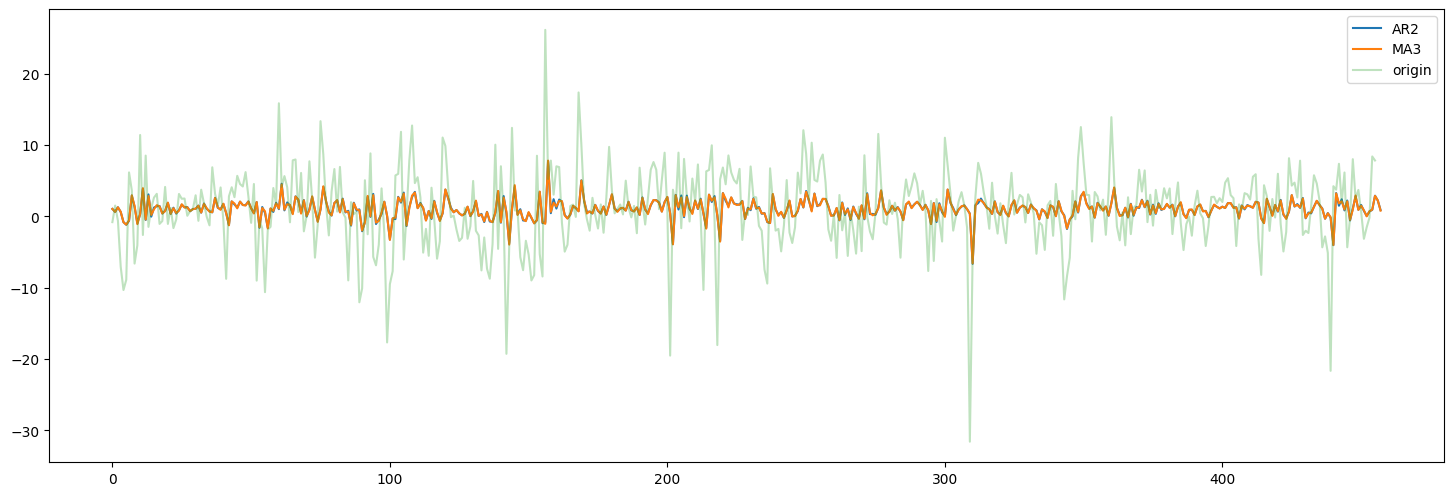

In [144]:
p1 = result1.predict(start=0, end =len(data) + 1 )
p2 = result2.predict(start=0, end =len(data) + 1 )
plt.plot(p1)
plt.plot(p2)
plt.plot(data,alpha=0.3)
plt.legend(['AR2','MA3','origin'])
plt.show()

从拟合图来看，基本上两个模型都拟合效果相同。
从AIC，BIC看也基本一样，AR2稍微好一点点，但基本没有差别。